#Desafio 1

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar algumas análises utilizando um arquivo csv diferente: alunos.csv.

### 1. Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"

In [3]:
dados = pd.read_csv(url, sep = ",")

### 2. Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

In [4]:
dados.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [5]:
dados.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### 3. Confira a quantidade de linhas e colunas desse DataFrame.

In [6]:
dados.shape

(18, 4)

### 4. Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [7]:
#Primeiro vamos analisar o nome de cada coluna
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [8]:
dados["Idade"]

0     20
1     18
2     27
3     18
4     21
5     23
6     21
7     19
8     35
9     28
10    21
11    24
12    26
13    25
14    37
15    29
16    33
17    34
Name: Idade, dtype: int64

In [9]:
dados[["Idade","Notas"]]

,Idade,Notas
0,20,7.5
1,18,NaN
2,27,2.5
3,18,5.0
4,21,10.0
5,23,NaN
6,21,7.0
7,19,6.0
8,35,5.6
9,28,NaN


In [10]:
#Podemos ver os tipos através da funcao Dataframe.info()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [11]:
#Para ver os tipos também podemos usar o seguinte comando
dados.dtypes

Nome         object
Idade         int64
Notas       float64
Aprovado       bool
dtype: object

### **Extra**: Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). Dica: pesquise pelo método describe.

In [12]:
dados.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


#Desafio 2

O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

In [13]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"
dados = pd.read_csv(url,sep=";")
df = dados.query("Tipo == 'Apartamento'")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN



### 1. Calcular a média de quartos por apartamento;

In [14]:
df["Quartos"].mean()

2.481568707761622

###2. Conferir quantos bairros únicos existem na nossa base de dados;

In [15]:
Bairros = dados.Bairro.unique()

In [16]:
Bairros.size

162

3. Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

In [17]:
dados.groupby("Bairro")[["Bairro","Valor"]].mean(numeric_only = True).sort_values("Valor",ascending = False)

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308
...,...
Inhoaíba,738.888889
Turiaçu,733.333333
Magalhães Bastos,726.666667


### 4. Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [18]:
bairro_mais_caros = dados.groupby("Bairro")[["Bairro","Valor"]].mean(numeric_only = True).sort_values("Valor",ascending = False)

<Axes: xlabel='Bairro', ylabel='Preço'>

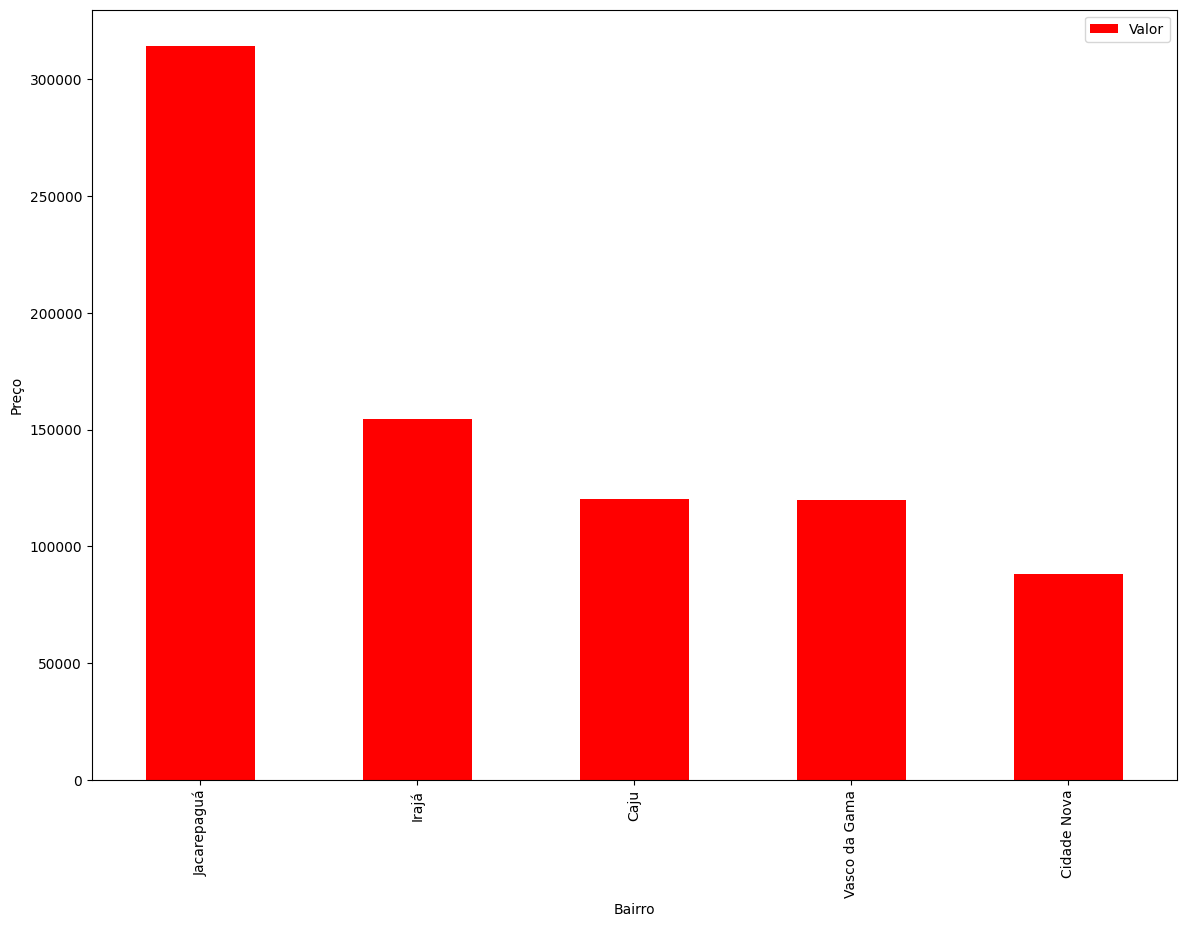

In [19]:
bairro_mais_caros = bairro_mais_caros.head()
bairro_mais_caros.plot( kind = "bar", figsize = (14,10), color = "red",
                       xlabel = "Bairro", ylabel = "Preço")

#Desafio 3

Durante o desenvolvimento do nosso projeto, nós aplicamos alguns filtros na nossa base de dados e salvamos os DataFrames resultantes em diferentes variáveis, sendo elas: df_1, df_2 e df_3.

Com base nisso, salve esses DataFrames em 3 arquivos csv distintos para que o time de ML possa ter acesso a esses dados de forma mais prática.

In [21]:
#Primeiro vamos limpar a base
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [22]:
#Substitui os valores na por 0

df = df.fillna(0)

In [23]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0


In [26]:
df.query("Valor == 0 | Condominio == 0").index

Int64Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,
              292,
            ...
            32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708,
            32809],
           dtype='int64', length=752)

In [27]:
df.drop(df.query("Valor == 0 | Condominio == 0").index,axis=0,inplace=True)

In [29]:
df.query("Valor == 0 | Condominio == 0").index

Int64Index([], dtype='int64')

In [28]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [30]:
#Vamos tirar a coluna Tipos, visto que soh temos apartamentos
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [31]:
df.drop("Tipo", axis=1,inplace=True)

In [32]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [36]:
#Agora vamos aplicar os filtros
#Filtro 1: Valor <= 1200 e 1 quarto

selecao1 = ((df["Valor"]<=1200)&(df["Quartos"]==1))
df_1 = df[selecao1]

In [37]:
df_1.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0


In [39]:
#Filtro 2:
selecao2 = ((df["Quartos"]>=2)&(df["Valor"]<=3000)&(df["Area"]>=70))
df_2 = df[selecao2]

In [40]:
df_2.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0


In [43]:
#Agora vamos salvar esses dataframes

df_1.to_csv("Apartamentos_1_Quarto_menor_1200.csv",index=False,sep=";")
df_2.to_csv("Apartamentos_2_Quartos_menor_3000.csv",index=False,sep=";")

In [45]:
pd.read_csv("Apartamentos_1_Quarto_menor_1200.csv",sep=";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
633,Grajaú,1,0,1,37,1000.0,200.0,0.0
634,Pechincha,1,0,1,69,900.0,640.0,126.0
635,Glória,1,0,0,46,1100.0,453.0,32.0
636,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [46]:
pd.read_csv("Apartamentos_2_Quartos_menor_3000.csv",sep=";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Grajaú,2,1,0,70,1500.0,642.0,74.0
1,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
2,Tijuca,2,1,0,110,1900.0,700.0,138.0
3,Tijuca,2,1,0,78,2000.0,700.0,0.0
4,Botafogo,2,1,0,76,2500.0,740.0,0.0
...,...,...,...,...,...,...,...,...
5595,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0
5596,Leblon,3,0,1,80,3000.0,1010.0,249.0
5597,Méier,2,0,0,70,900.0,490.0,48.0
5598,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


#Desafio 4

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar alguns tratamentos e seleções utilizando um arquivo csv diferente: alunos.csv.

Esse arquivo é o mesmo utilizado para resolução dos desafios da aula 1 e possui dados referentes a alunos de um curso superior.

Com base nisso, solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

### 1. Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

In [57]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
dados = pd.read_csv(url,sep=",")

In [59]:
dados.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [55]:
#Vamos subistituir as notas em na por zero, já que todos que tiveram na foram reprovados
dados.fillna(0,inplace=True)
dados.query("Notas == 0")

,Nome,Idade,Notas,Aprovado
1,Ana,18,0.0,False
5,Bruna,23,0.0,False
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
14,Paulo,37,0.0,False
16,Lucas,33,0.0,False


### 2. Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

In [61]:
dados.drop(dados.query("Nome=='Ana'|Nome=='Carlos'").index, axis=0,inplace=True)

### 3. Aplique um filtro que selecione apenas os alunos que foram aprovados.

In [64]:
aprovados = dados.query("Aprovado == True")
aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### 4. Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [65]:
aprovados.to_csv("alunos_aprovados.csv",index=False,sep=";")

### **Extra**: Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [67]:
aprovados.query("Notas == 7")

,Nome,Idade,Notas,Aprovado
6,Dara,21,7.0,True
15,Mylena,29,7.0,True


In [71]:
aprovados.replace(7,8)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


# Desafio 5

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar alguns tratamentos e seleções utilizando um arquivo csv diferente: alunos.csv.

Esse arquivo é o mesmo utilizado para resolução dos desafios da aula 1 e 3 e possui dados referentes a alunos de um curso superior. Com base nisso, solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

### 1. Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [80]:
dados = pd.read_csv(url,sep=",")
dados.fillna(0,inplace=True)

In [83]:
dados["Pontos_Extras"] = dados["Notas"].apply(lambda x: x*0.4)
dados.head()

,Nome,Idade,Notas,Aprovado,Pontos_Extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


### 2. Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [84]:
dados["Notas_finais"] = dados["Notas"]  + dados["Pontos_Extras"]
dados.head()

,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


### 3. Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [86]:
dados["Aprovado_final"] = dados["Notas_finais"].apply(lambda x: True if x>=6 else False)
dados.head()

,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True


### 4. Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [87]:
selecao = ((dados["Aprovado"]==False)&(dados["Aprovado_final"]==True))
dados[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
